# Modulo 4 Desarrollo de modelos 

___    
En Este [link] (https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DA0101EN/model-development.ipynb) se encuentra la relacionado con el Modulo 4 del curso ciencia de datos de edx 
___   

En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil

Algunas preguntas que queremos hacer en este módulo

* ¿sé si el distribuidor está ofreciendo un valor justo para mi intercambio? 
* ¿sé si pongo un valor justo en mi automóvil? 

Análisis de datos, a menudo usamos **Desarrollo de modelos** para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos. 

 Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado. 

Importar Librerias


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se carga el dataframe en df 


In [191]:
path = 'modulo4_autos.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Regresión lineal y regresión lineal múltiple

#### Regresión Lineal
Un ejemplo de un modelo de datos que usaremos es:    
**Regresión lineal simple.**    
La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:  
* El predictor / variable independiente (X)
* La respuesta / variable dependiente (que queremos predecir) (Y)   
 
El resultado de la regresión lineal es una **función lineal*** que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).

$$
 Y: Response \ Variable\\   
 X: Predictor \ Variables      
 
$$

** 
Función Linear
$$
Yhat = a + b  X
$$

* a se refiere a la intersección de la línea de regresión0, en otras palabras: el valor de Y cuando X es 0
* b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el que Y cambia cuando X aumenta en 1 unidad



####  Cargar los Modulos para la regresión Lineal

In [192]:
from sklearn.linear_model import LinearRegression

Se crea un Objeto tipo LinearRegression

In [193]:
lm = LinearRegression()
lm

LinearRegression()

#### ¿Cómo podría ayudarnos Highway-mpg a predecir el precio del automóvil?

Para este ejemplo, queremos ver cómo mpg en carretera puede ayudarnos a predecir el precio del automóvil. Usando una regresión lineal simple, crearemos una función lineal con `highway-mpg` como variable predictiva y el `precio` como variable de respuesta.

In [194]:
X = df[['highway-mpg']]
Y = df['price']

Ajuste el modelo lineal usando mpg en carretera.

In [195]:
lm.fit(X,Y)

LinearRegression()

Podemos emitir una predicción

In [196]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### ¿Cuál es el valor de la intersección (a)? 
$$
Yhat = a 
$$

In [197]:
lm.intercept_

38423.3058581574

#### ¿Cuál es el valor de la pendiente (b)?

$$
Yhat =  b  X
$$

In [198]:
lm.coef_

array([-821.73337832])

### ¿Cuál es el modelo lineal estimado final que obtenemos?

Como vimos anteriormente, deberíamos obtener un modelo lineal final con la estructura:
$$
Yhat = a + b  X
$$

Al conectar los valores reales que obtenemos:

price = 38423.31 - 821.73 * highway-mpg

Ejemplo con `engine-size`   
1. Crear el Objeto de Regresión Lineal



In [199]:
lm1 = LinearRegression()

2. Se entrena el Modelo Usando `engine-size` como variable independiente y `price` como variable objetivo

In [200]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

3. Se realiza la ecuación ***modelo de predicción***
$$
Yhat = a + b  X
$$

In [201]:
Yhat=lm1.predict(X)
Yhat[0:5] 

array([[-3458.11848261],
       [-3458.11848261],
       [-3624.9784983 ],
       [-2957.53843554],
       [-4292.41856107]])

4. Imprimir el valor de la insterseccón y de la pendiente

In [202]:
lm1.coef_



array([[166.86001569]])

In [203]:
lm1.intercept_

array([-7963.33890628])

la ecuación para la variable independiente tamaño de motor y el precio es la siguiente.
$$
Yhat = -7963.33890628 + 166.86001569  X
$$
$$
price = -7963.33890628 + 166.86001569  * engine-size
$$

#### Regresión Lineal Multiple
¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?   

Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar `Regresión lineal múltiple.` La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

La ecuación viene dada por:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

De la sección anterior sabemos que otros buenos predictores de precio podrían ser:
* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Desarrollemos un modelo usando estas variables como variables predictoras.

1. definimos en una variable, en este caso `z` con las que vamos a trabajar

In [204]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

2.Ajuste el modelo lineal utilizando las cuatro variables mencionadas anteriormente.

In [205]:
lm.fit(Z, df['price'])

LinearRegression()

3. ¿Cuál es el valor de la intersección (a)?

In [206]:
lm.intercept_

-15806.62462632922

4.¿Cuáles son los valores de los coeficientes (b1, b2, b3, b4)?

In [207]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

5. ¿Cuál es el modelo lineal estimado final que obtenemos?   
Como vimos anteriormente, deberíamos obtener una función lineal final con la estructura:    
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$    
¿Cuál es la función lineal que obtenemos en este ejemplo?
$$
Yhat = -15806.62462632922 + 53.49574423 * horsepower + 4.70770099 * curb-weight + 81.53026382 * engine-size + 36.05748882 * highway-mpg 
$$ 

***Ejemplo 2 de Regresión Lineal Multiple***

In [208]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])
lm2.intercept_


38201.31327245728

In [209]:
lm2.coef_

array([   1.49789586, -820.45434016])

### Evaluación del modelo usando visualización

Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y cómo elegimos el mejor? Una forma de hacerlo es mediante la visualización.

importar el paquete de visualización: seaborn

In [210]:
import seaborn as sns
%matplotlib inline 

### Trama de regresión
Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante el uso de `gráficos de regresión.`    

Este gráfico mostrará una combinación de puntos de datos dispersos `(un gráfico de dispersión)`, así como la línea de `regresión lineal` ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).
Visualicemos Horsepower como una posible variable predictora de precio:

(0.0, 48160.45284288969)

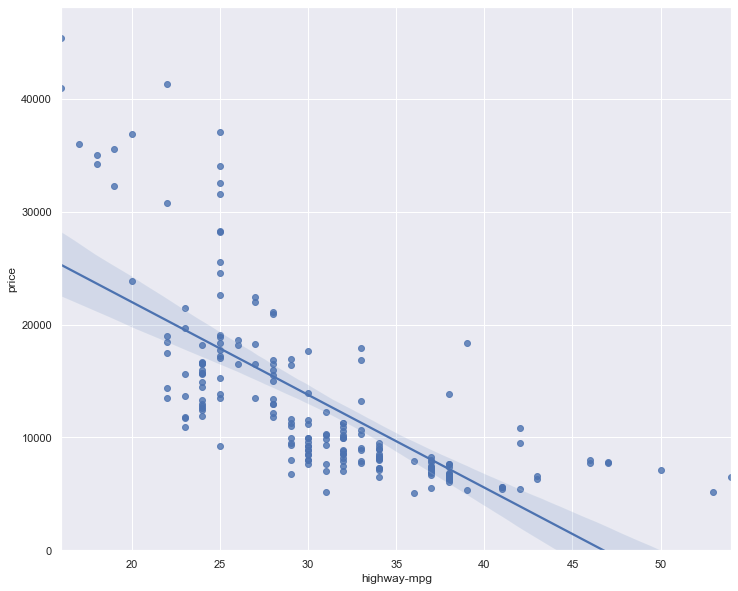

In [211]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

> Podemos ver en este gráfico que el precio se correlaciona negativamente con mpg en carretera, ya que la pendiente de regresión es negativa. Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a la dispersión de los puntos de datos alrededor de la línea de regresión. Esto le dará una buena indicación de la varianza de los datos, y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado lejos de la línea, este modelo lineal podría no ser el mejor modelo para estos datos. Comparemos este gráfico con el gráfico de regresión de "pico-rpm".

(0.0, 47414.1)

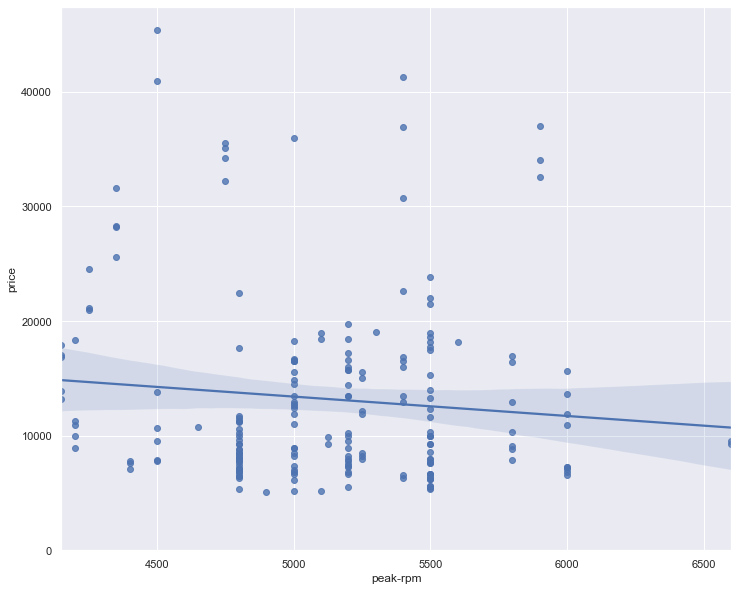

In [212]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

> Comparando el gráfico de regresión de "rpm máximas" y "mpg en carretera", vemos que los puntos para "mpg en carretera" están mucho más cerca de la línea generada y en promedio disminuyen. Los puntos para "rpm máximas" se han extendido más alrededor de la línea pronosticada, y es mucho más difícil determinar si los puntos están disminuyendo o aumentando a medida que aumenta el "mpg en carretera

In [213]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


> Con la correlación podemos ver que la correlación es mas fuerte entre al precio y highway-mpg, a comparación con el peak-rpm.

### Grafico Residual
Una buena manera de visualizar la varianza de los datos es usar un gráfico residual.    
¿Qué es un residuo?
La diferencia entre el valor observado (y) y el valor predicho (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residual es la distancia desde el punto de datos hasta la línea de regresión ajustada.
Entonces, ¿qué es una trama residual?
Un gráfico residual es un gráfico que muestra los residuos en el eje vertical yy la variable independiente en el eje horizontal x.
¿A qué prestamos atención cuando observamos una parcela residual?
Nos fijamos en la propagación de los residuos:

Si los puntos en un gráfico residual se distribuyen` aleatoriamente alrededor del eje x`, entonces un `modelo lineal es apropiado` para los datos. ¿Porqué es eso? Los residuos distribuidos aleatoriamente significan que la varianza es constante y, por lo tanto, el modelo lineal es un buen ajuste para estos datos.


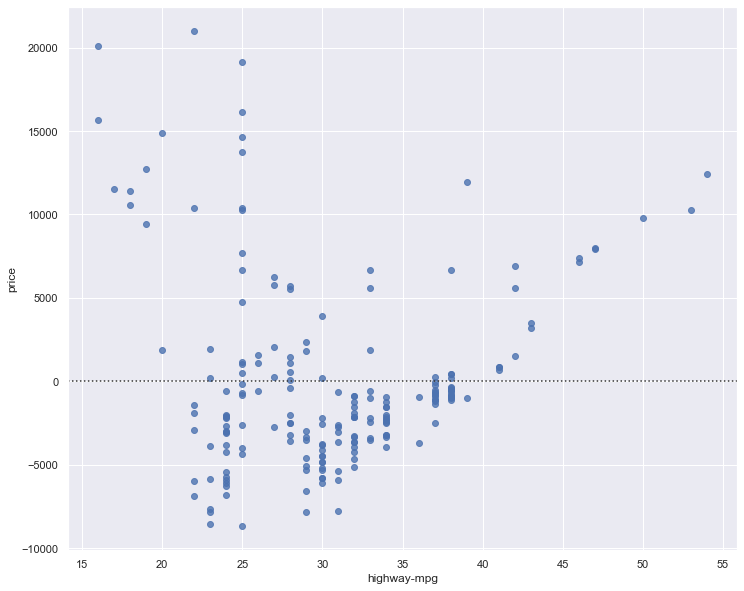

In [214]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

¿Qué nos dice esta trama?
Podemos ver en esta gráfica residual que los residuos no se distribuyen aleatoriamente alrededor del eje x,lo que nos lleva a creer que quizás un modelo no lineal sea más apropiado para estos datos.


### Regresión lineal múltiple

¿Cómo visualizamos un modelo para regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirando el diagrama de distribución: podemos ver la distribución de los valores ajustados que resultan del modelo y compararlo con la distribución de los valores reales.

Primero hagamos una predicción

In [215]:
Y_hat = lm.predict(Z)

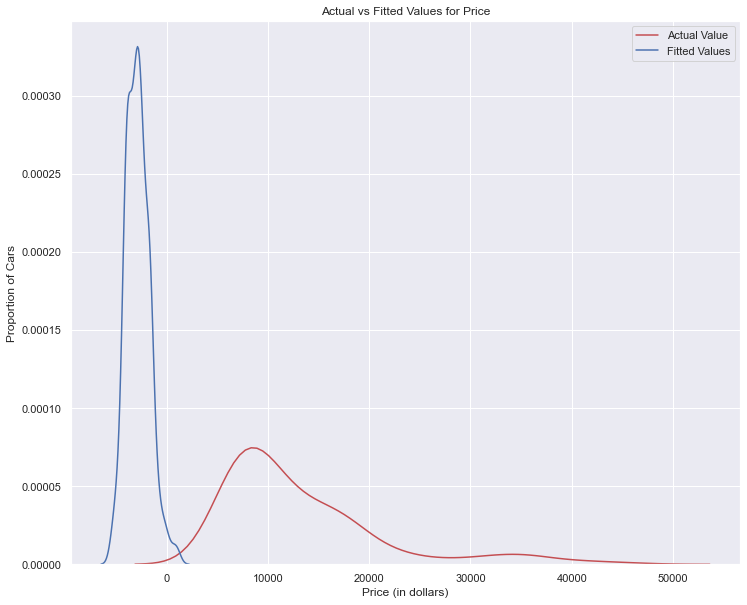

In [216]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Podemos ver que los valores ajustados son razonablemente cercanos a los valores reales, ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay margen de mejora.

### Parte 3: Regresión polinómica y tuberías

`La regresión polinómica` es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales al cuadrar o establecer términos de orden superior de las variables predictoras.

Existen diferentes órdenes de regresión polinómica:

De segundo Orden
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


Cubica de Tercer Orden
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


De orden superior
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$



Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste mientras usaba mpg en carretera como variable predictiva. Veamos si podemos intentar ajustar un modelo polinómico a los datos.

Utilizaremos la siguiente función para trazar los datos:

In [217]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

vamos a obtener las variables:

In [218]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función polyfit, luego usemos la función poly1d para mostrar la función polinomial.


In [219]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


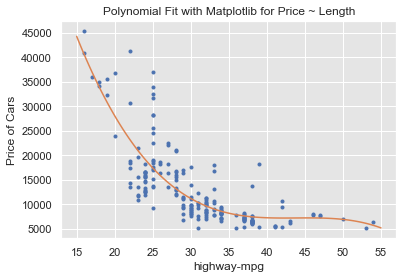

In [220]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

> Ya podemos ver al trazar que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinómica generada "golpea" más puntos de datos.



3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


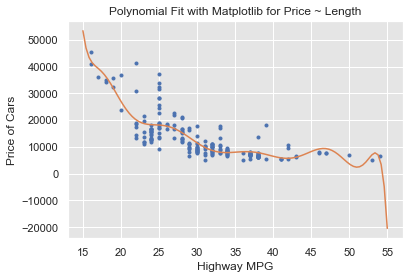

In [223]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión para un polinomio de segundo orden (grado = 2) con dos variables viene dada por:


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

Podemos realizar una transformación polinómica en múltiples características. Primero, importamos el módulo:

In [224]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto PolynomialFeatures de grado 2:

In [225]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

Características polinomiales (grado = 2, incluye_bias = Verdadero, interacción_solo = Falso)

In [226]:
Z_pr=pr.fit_transform(Z)

Los datos originales son de 201 muestras y 4 características.

In [227]:
Z.shape

(201, 4)

Después de la transformación, hay 201 muestras y 15 características

In [228]:
Z_pr.shape

(201, 15)

### Pipeline
Las canalizaciones de datos simplifican los pasos de procesamiento de los datos. Usamos el módulo Pipeline para crear una tubería. También usamos StandardScaler como un paso en nuestro proceso.

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos la tubería, creando una lista de tuplas que incluye el nombre del modelo o estimador y su constructor correspondiente.

In [230]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

ingresamos la lista como argumento para el constructor de tuberías

In [231]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

In [232]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Del mismo modo, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente

In [233]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

se plantea el siguiente ejercicio:
Cree una tubería que estandarice los datos, luego realice la predicción usando un modelo de regresión lineal usando las características Z y objetivos y

In [234]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Parte 4: Medidas para la evaluación en muestra

Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar la precisión del modelo.
Dos medidas muy importantes que a menudo se usan en estadísticas para determinar la precisión de un modelo son:   

* R ^ 2 / R-cuadrado
* Mean Squared Error (MSE)

**R-cuadrado***
R al cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor del R cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

**Error Cuadrático Medio (MSE)**
El error cuadrático medio mide el promedio de los cuadrados de errores, es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).


### Modelo 1: regresión lineal simple
Vamos a calcular el R ^ 2

In [235]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Podemos decir que ~ 49.659% de la variación del precio se explica por este simple modelo lineal `horsepower_fit`.
Calculemos el MSE
Podemos predecir la salida, es decir, `yhat` usando el método de predicción, donde X es la variable de entrada:

In [236]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


vamos a importar la función `mean_squared_error` de las `métricas` del módulo

In [237]:
from sklearn.metrics import mean_squared_error

comparamos los resultados pronosticados con los resultados reales

In [238]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Modelo 2: Regresión lineal múltiple
Vamos a calcular el R ^ 2

In [239]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que ~ 80.896% de la variación del precio se explica por esta regresión lineal múltiple `multi_fit`.
Calculemos el MSE
producimos una predicción


Y_predict_multifit = lm.predict(Z)

comparamos los resultados pronosticados con los resultados reales

In [240]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Modelo 2: Regresión lineal múltiple
Vamos a calcular el R ^ 2

In [241]:
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


> Podemos decir que ~ 80.896% de la variación del precio se explica por esta regresión lineal múltiple "multi_fit".


Calculemos el MSE

producimos una predicción

In [242]:
Y_predict_multifit = lm.predict(Z)

comparamos los resultados pronosticados con los resultados reales

In [243]:
print('El error cuadrático medio de precio y valor predicho usando multifit es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El error cuadrático medio de precio y valor predicho usando multifit es:  11980366.87072649


### Modelo 3: ajuste polinómico



Vamos a calcular el R ^ 2

importaremos la función r2_score de las métricas del módulo ya que estamos usando una función diferente

In [244]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el valor de r ^ 2

In [245]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


> Podemos decir que ~ 67.419% de la variación del precio se explica por este ajuste polinómico

### MSE

ambién podemos calcular el MSE:

In [247]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Part 5: Predicción y toma de decisiones
### Predicción
En la sección anterior, entrenamos el modelo utilizando el método de `ajuste`. Ahora usaremos el método `predic` para producir una predicción. Permite importar `pyplot` para trazar; también usaremos algunas funciones de numpy.

In [248]:
import matplotlib.pyplot as plt
import numpy as np

Crear una nueva entrada de datos (la cantidad de datos a tabular o manejar)

In [249]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Se entrena el modelo

In [250]:
lm.fit(X, Y)
lm

LinearRegression()


Se ejecuta una precicción (se tabulan unos datos)

In [251]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Podemos graficar los datos 

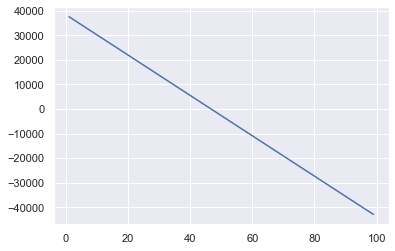

In [252]:
plt.plot(new_input, yhat)
plt.show()

### Toma de decisiones: determinar un buen ajuste del modelo
Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

* ¿Qué es un buen valor R cuadrado?
Al comparar modelos, `el modelo con el valor R cuadrado más alto se ajusta mejor` a los datos.
* ¿Qué es un buen MSE?
Al comparar modelos, `el modelo con el valor MSE más pequeño se ajusta mejor` a los datos.

**Echemos un vistazo a los valores para los diferentes modelos.** 
  
Regresión lineal simple: uso de Highway-mpg como variable de predicción de precio.
* R cuadrado: 0.49659118843391759
* MSE: 3.16 x10 ^ 7

Regresión lineal múltiple: uso de caballos de fuerza, peso en vacío, tamaño del motor y mpg en carretera como variables predictoras de precio.
* R cuadrado: 0.80896354913783497
* MSE: 1.2 x10 ^ 7

Ajuste polinómico: uso de Highway-mpg como variable de predicción de precio.
* R cuadrado: 0.6741946663906514
* MSE: 2.05 x 10 ^ 7


### Modelo de regresión lineal simple (SLR) versus modelo de regresión lineal múltiple (MLR)
Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. A veces puede no tener suficientes datos, puede encontrarse con problemas numéricos, o muchas de las variables pueden no ser útiles o incluso actuar como ruido. Como resultado, siempre debe verificar el MSE y R ^ 2.

Entonces, para poder comparar los resultados de los modelos MLR vs SLR, observamos una combinación de R-cuadrado y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

* `MSE`: El MSE de SLR es 3.16x10 ^ 7 mientras que MLR tiene un MSE de 1.2 x10 ^ 7. El MSE de MLR es mucho más pequeño.   
* R cuadrado: en este caso, también podemos ver que hay una gran diferencia entre el R cuadrado de la SLR y el R cuadrado de la MLR. El R cuadrado para el SLR (~ 0.497) es muy pequeño en comparación con el R cuadrado para el MLR (~ 0.809).

Este R cuadrado en combinación con el MSE muestra que MLR parece ser el mejor modelo en este caso, en comparación con SLR.

### Modelo lineal simple (SLR) vs ajuste polinómico
* `MSE`: Podemos ver que Polynomial Fit derribó el MSE, ya que este MSE es más pequeño que el del SLR.
* `R-cuadrado`: el R-cuadrado para el Polyfit es más grande que el R-cuadrado para el SLR, por lo que el ajuste polinómico también trajo un poco el R-cuadrado.

Dado que el ajuste polinómico resultó en un MSE más bajo y un R cuadrado más alto, podemos concluir que este era un modelo de mejor ajuste que la regresión lineal simple para predecir el precio con Highway-mpg como variable predictiva.

### Regresión lineal múltiple (MLR) vs ajuste polinómico
* `MSE`: el MSE para el MLR es más pequeño que el MSE para el ajuste polinómico.
* `R cuadrado`: El R cuadrado para el MLR también es mucho más grande que para el ajuste polinómico.

## Conclusión:
Comparando estos tres modelos, concluimos que `el modelo MLR es el mejor modelo` para poder predecir el precio de nuestro conjunto de datos. Este resultado tiene sentido, ya que tenemos 27 variables en total, y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.
